<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Model3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
path_to_file = tf.keras.utils.get_file('CoinDesk.csv',
                                       'https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv')

188416/178509 [===============================] - 0s 0us/step


In [4]:
raw_df = pd.read_csv(path_to_file)
raw_df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2782,BTC,2021-05-14,49764.132082,49596.778891,51448.798576,46294.720180
2783,BTC,2021-05-15,50032.693137,49717.354353,51578.312545,48944.346536
2784,BTC,2021-05-16,47885.625255,49926.035067,50690.802950,47005.102292
2785,BTC,2021-05-17,45604.615754,46805.537852,49670.414174,43868.638969


In [5]:
data_df = raw_df[{'Date', 'Closing Price (USD)'}]
data_df

,Date,Closing Price (USD)
0,2013-10-01,123.654990
1,2013-10-02,125.455000
2,2013-10-03,108.584830
3,2013-10-04,118.674660
4,2013-10-05,121.338660
...,...,...
2782,2021-05-14,49764.132082
2783,2021-05-15,50032.693137
2784,2021-05-16,47885.625255
2785,2021-05-17,45604.615754


In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
dtypes: float64(1), object(1)
memory usage: 43.7+ KB


In [7]:
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 2787 non-null   datetime64[ns]
 1   Closing Price (USD)  2787 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 43.7 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
data_df = data_df.set_index('Date')
data_df

,Closing Price (USD)
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


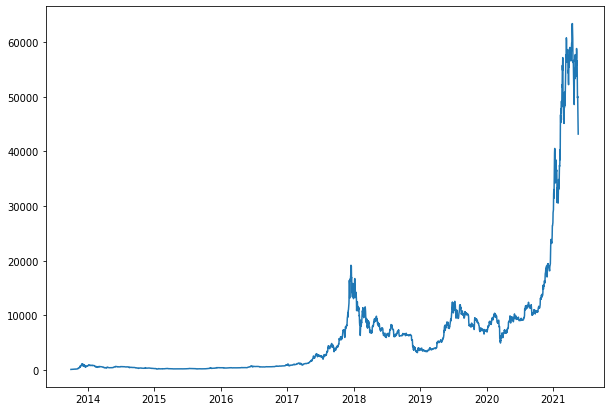

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(data_df['Closing Price (USD)'])

In [10]:
WIN_SIZE = 7
HORIZON = 1

windowed_data_df = data_df.copy()

In [11]:
for i in range(WIN_SIZE):
  windowed_data_df[f'Price+{i+1}'] = windowed_data_df['Closing Price (USD)'].shift(periods=i+1, axis=0)
windowed_data_df = windowed_data_df.dropna()
windowed_data_df

,Closing Price (USD),Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990
2013-10-09,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000
2013-10-10,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830
2013-10-11,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660
2013-10-12,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660
...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679


##Adding new features

In [12]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [13]:
block_reward_2_days = (block_reward_3_datetime - windowed_data_df.index[0]).days
block_reward_3_days = (block_reward_4_datetime - windowed_data_df.index[0]).days

In [14]:
block_reward_2_days, block_reward_3_days

(1005, 2407)

In [15]:
windowed_data_df['block_reward'] = None

windowed_data_df.iloc[: block_reward_2_days, -1] = block_reward_2
windowed_data_df.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
windowed_data_df.iloc[block_reward_3_days:, -1] = block_reward_4

In [16]:
windowed_data_df

,Closing Price (USD),Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,block_reward
Date,,,,,,,,,
2013-10-08,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990,25
2013-10-09,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,25
2013-10-10,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,25
2013-10-11,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,25
2013-10-12,125.927500,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,25
...,...,...,...,...,...,...,...,...,...
2021-05-14,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879,6.25
2021-05-15,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,6.25
2021-05-16,47885.625255,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,6.25


#Train, test, split

In [19]:
df_features = windowed_data_df.drop(['Closing Price (USD)'], axis=1)
df_features

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,block_reward
Date,,,,,,,,
2013-10-08,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990,25
2013-10-09,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,25
2013-10-10,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,25
2013-10-11,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,25
2013-10-12,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,25
...,...,...,...,...,...,...,...,...
2021-05-14,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,56583.849879,6.25
2021-05-15,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,57107.120672,6.25
2021-05-16,50032.693137,49764.132082,52147.821187,56573.555472,55715.546651,58102.191426,58788.209679,6.25


In [18]:
df_target = windowed_data_df['Closing Price (USD)']
df_target

Date
2013-10-08      123.033000
2013-10-09      124.049000
2013-10-10      125.961160
2013-10-11      125.279660
2013-10-12      125.927500
                  ...     
2021-05-14    49764.132082
2021-05-15    50032.693137
2021-05-16    47885.625255
2021-05-17    45604.615754
2021-05-18    43144.471291
Name: Closing Price (USD), Length: 2780, dtype: float64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features,
                                                    df_target,
                                                    shuffle=False,
                                                    test_size = 0.2)

In [43]:
X_train

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,block_reward
Date,,,,,,,,
2013-10-08,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990,25
2013-10-09,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,25
2013-10-10,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,25
2013-10-11,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,25
2013-10-12,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,25
...,...,...,...,...,...,...,...,...
2019-11-05,9202.415451,9290.896602,9197.632345,9131.410630,9225.995479,9455.724693,9458.223360,12.5
2019-11-06,9369.628081,9202.415451,9290.896602,9197.632345,9131.410630,9225.995479,9455.724693,12.5
2019-11-07,9326.599624,9369.628081,9202.415451,9290.896602,9197.632345,9131.410630,9225.995479,12.5


In [22]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [44]:
X_train

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7,block_reward
Date,,,,,,,,
2013-10-08,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,123.654990,25
2013-10-09,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,125.455000,25
2013-10-10,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,108.584830,25
2013-10-11,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,118.674660,25
2013-10-12,125.279660,125.961160,124.049000,123.033000,121.795000,120.655330,121.338660,25
...,...,...,...,...,...,...,...,...
2019-11-05,9202.415451,9290.896602,9197.632345,9131.410630,9225.995479,9455.724693,9458.223360,12.5
2019-11-06,9369.628081,9202.415451,9290.896602,9197.632345,9131.410630,9225.995479,9455.724693,12.5
2019-11-07,9326.599624,9369.628081,9202.415451,9290.896602,9197.632345,9131.410630,9225.995479,12.5


In [46]:
# train_windows = X_train[:, :-1]
# train_block_rewards = X_train[:, -1]
# train_labels = y_train

# test_windows = X_test[:, :-1]
# test_block_rewards = X_test[:, -1]
# test_labels = y_test

In [52]:
train_windows = X_train.drop(['block_reward'], axis=1).astype(np.float32)
train_block_rewards = X_train['block_reward'].astype(np.float32)
train_labels = y_train.astype(np.float32)

test_windows = X_test.drop(['block_reward'], axis=1).astype(np.float32)
test_block_rewards = X_test['block_reward'].astype(np.float32)
test_labels = y_test.astype(np.float32)

In [59]:
price_inputs = layers.Input(shape=(7,), dtype=tf.float32)
price_outputs = layers.Dense(128, activation='relu')(price_inputs)
price_model = tf.keras.Model(price_inputs, price_outputs)

block_reward_inputs = layers.Input(shape=(1,), dtype=tf.float32)
block_reward_outputs = layers.Dense(32, activation='relu')(block_reward_inputs)
block_reward_model = tf.keras.Model(block_reward_inputs, block_reward_outputs)

concat_layer = layers.Concatenate()([price_model.output,
                                     block_reward_model.output])
output_layer = layers.Dense(1)(concat_layer)

model = tf.keras.Model(inputs=[price_model.input,
                                 block_reward_model.input],
                         outputs=output_layer,
                         name='model_multi')

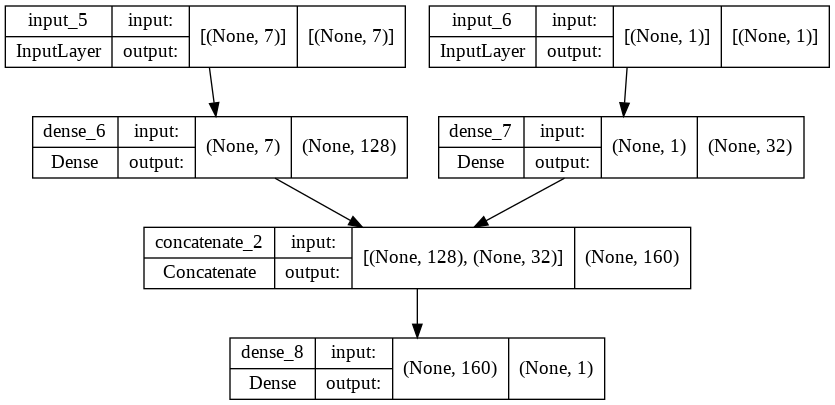

In [49]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [60]:
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

In [63]:
import os 
def create_model_checkpoint(model_name, save_path="model_checkpoints"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), 
                                            verbose=0, 
                                            save_weights_only=True,
                                            save_best_only=True)

In [64]:
history = model.fit((train_windows, train_block_rewards),
                    train_labels,
                    validation_data=((test_windows, test_block_rewards), test_labels),
                    epochs=100, batch_size=128,
                    callbacks=[create_model_checkpoint(model.name)])

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 1170.7434 - val_loss: 2760.8376
Epoch 2/100
18/18 [==============================] - 0s 5ms/step - loss: 312.2236 - val_loss: 1373.3368
Epoch 3/100
18/18 [==============================] - 0s 5ms/step - loss: 204.4269 - val_loss: 1237.3750
Epoch 4/100
18/18 [==============================] - 0s 5ms/step - loss: 187.8795 - val_loss: 1048.1210
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 179.5415 - val_loss: 1005.2551
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 177.3929 - val_loss: 1086.1615
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 172.0850 - val_loss: 954.6080
Epoch 8/100
18/18 [==============================] - 0s 4ms/step - loss: 164.2156 - val_loss: 937.0014
Epoch 9/100
18/18 [==============================] - 0s 5ms/step - loss: 159.4634 - val_loss: 958.5248
Epoch 10/100
18/18 [==============================] - 0s 4ms/step

In [65]:
model.load_weights("model_checkpoints/model_multi")
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model.evaluate((test_windows, test_block_rewards), test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 561.3287 - mae: 561.3287 - mse: 1150064.7500


[561.3286743164062, 561.3286743164062, 1150064.75]